In [72]:
from nn_grad import Node
from nn_loss import MinsqrLoss, LogLoss
from nn_optimizer import AdamOptim, StochasticOptim
from nn_layer import *
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [73]:
from sklearn.datasets import load_iris
iris = load_iris()


In [74]:
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
dataframe = pd.DataFrame(data, columns=columns)

In [75]:
dataframe.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

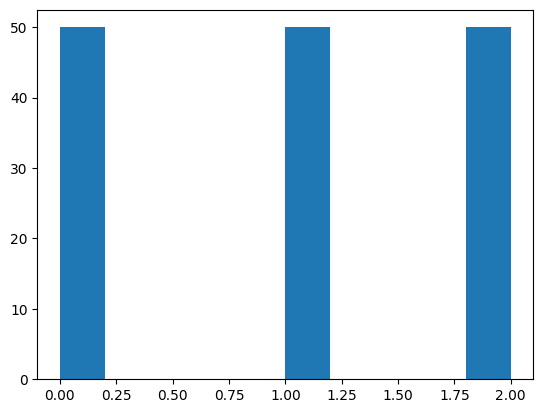

In [76]:
plt.hist(dataframe.loc[:, 'target'])

In [92]:
dt = dataframe.to_numpy()
x_ = dt[:, 0:4]
y_ = dt[:, 4]

y_ = np.array([[1, 0, 0] if y == 0 else [0, 1, 0]
              if y == 1 else [0, 0, 1] for y in y_])


In [93]:
x_train, x_test, y_train,y_test = train_test_split(x_, y_, test_size=0.25, shuffle=True)

In [94]:
def display(loss_scores, f1_scores, acc_scores):
    loss_scores = np.array(loss_scores)
    f1_scores = np.array(f1_scores)
    acc_scores = np.array(acc_scores)

    figure, axis = plt.subplots(1, 3)

    figure.set_figwidth(20)
    figure.set_figheight(10)

    axis[0].set_xlabel('epoch')
    axis[0].set_ylabel('loss')
    axis[0].set_title('Loss score')
    axis[0].plot(loss_scores[:, 2], loss_scores[:, 0],
                 marker='o', label='train')
    axis[0].plot(loss_scores[:, 2], loss_scores[:, 1],
                 marker='o', label='test')
    axis[0].legend()

    axis[1].set_xlabel('epoch')
    axis[1].set_ylabel('accuracy')
    axis[1].set_title('Accuracy score')
    axis[1].plot(acc_scores[:, 2], acc_scores[:, 0], marker='o', label='train')
    axis[1].plot(acc_scores[:, 2], acc_scores[:, 1], marker='o', label='test')
    axis[1].legend()

    axis[2].set_xlabel('epoch')
    axis[2].set_ylabel('f1')
    axis[2].set_title('F1 score')
    axis[2].plot(f1_scores[:, 2], f1_scores[:, 0], marker='o', label='train')
    axis[2].plot(f1_scores[:, 2], f1_scores[:, 1], marker='o', label='test')
    axis[2].legend()
    plt.show()

In [95]:

def train(net, x_train, y_train, x_test, y_test):
    np.seterr(all='ignore')

    indxs = list(range(0, x_train.shape[0]))

    epochs = 10 ** 5 * 3

    optim = AdamOptim(net, lr=10**-6)

    loss = LogLoss()


    acc_scores = []

    f1_scores = []

    loss_scores = []


    arg_train = np.argmax(y_train, 1)

    arg_test = np.argmax(y_test, 1)


    for epoch in range(0, epochs + 1):

        y_train_pred = net.forward(Node(x_train))

        loss_ = loss.backward(y_train_pred, y_train)

        optim.descend()


        if epoch % 10 ** 2 == 0:

            train_loss = loss_.val / y_train.shape[0] / y_train.shape[1]


            print(f'epoch: {epoch} loss value: {train_loss}')


            if epoch % 10 ** 3 == 0:

                y_test_pred = net.forward(Node(x_test))


                test_loss = loss.count_loss(

                    y_test_pred, y_test).val / y_train.shape[0] / y_train.shape[1]


                train_res = np.argmax(y_train_pred.val, axis=1)

                test_res = np.argmax(y_test_pred.val, axis=1)


                train_acc = accuracy_score(arg_train, train_res)

                test_acc = accuracy_score(arg_test, test_res)


                train_f1 = f1_score(arg_train, train_res, average='macro')

                test_f1 = f1_score(arg_test, test_res, average='macro')


                acc_scores.append([train_acc, test_acc, epoch])

                f1_scores.append([train_f1, test_f1, epoch])

                loss_scores.append([train_loss, test_loss, epoch])


            if train_loss < 10 ** -2:
                break

    return (loss_scores, f1_scores, acc_scores)

In [96]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplDot:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 10, with_bias=self.with_bias, kernel=Node.dot),
            ReluLayer(),
            LinearLayer(10, 5, with_bias=self.with_bias, kernel=Node.dot),
            LinearLayer(5, out_dim, with_bias=self.with_bias, kernel=Node.dot),
            SoftargmaxLayer()]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_

In [97]:
net1 = nnImplDot(x_train.shape[1], y_train.shape[1])
stats1 = train(net1, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 3.381224517715444
epoch: 100 loss value: 3.3645916008988004
epoch: 200 loss value: 3.3528870316855834
epoch: 300 loss value: 3.34220936340713
epoch: 400 loss value: 3.3318577087064765
epoch: 500 loss value: 3.3216344828131334
epoch: 600 loss value: 3.311474027387757
epoch: 700 loss value: 3.3013537913951345
epoch: 800 loss value: 3.291266397132708
epoch: 900 loss value: 3.2812099599340794
epoch: 1000 loss value: 3.271184625299091
epoch: 1100 loss value: 3.261191348898153
epoch: 1200 loss value: 3.2512314177413195
epoch: 1300 loss value: 3.241306272511054
epoch: 1400 loss value: 3.2314174497631805
epoch: 1500 loss value: 3.2215665621913403
epoch: 1600 loss value: 3.2117552923807136
epoch: 1700 loss value: 3.201985391420168
epoch: 1800 loss value: 3.192258679194225
epoch: 1900 loss value: 3.1825770451584052
epoch: 2000 loss value: 3.17294244911419
epoch: 2100 loss value: 3.163356921733298
epoch: 2200 loss value: 3.1538225646113083
epoch: 2300 loss value: 3.1443415495

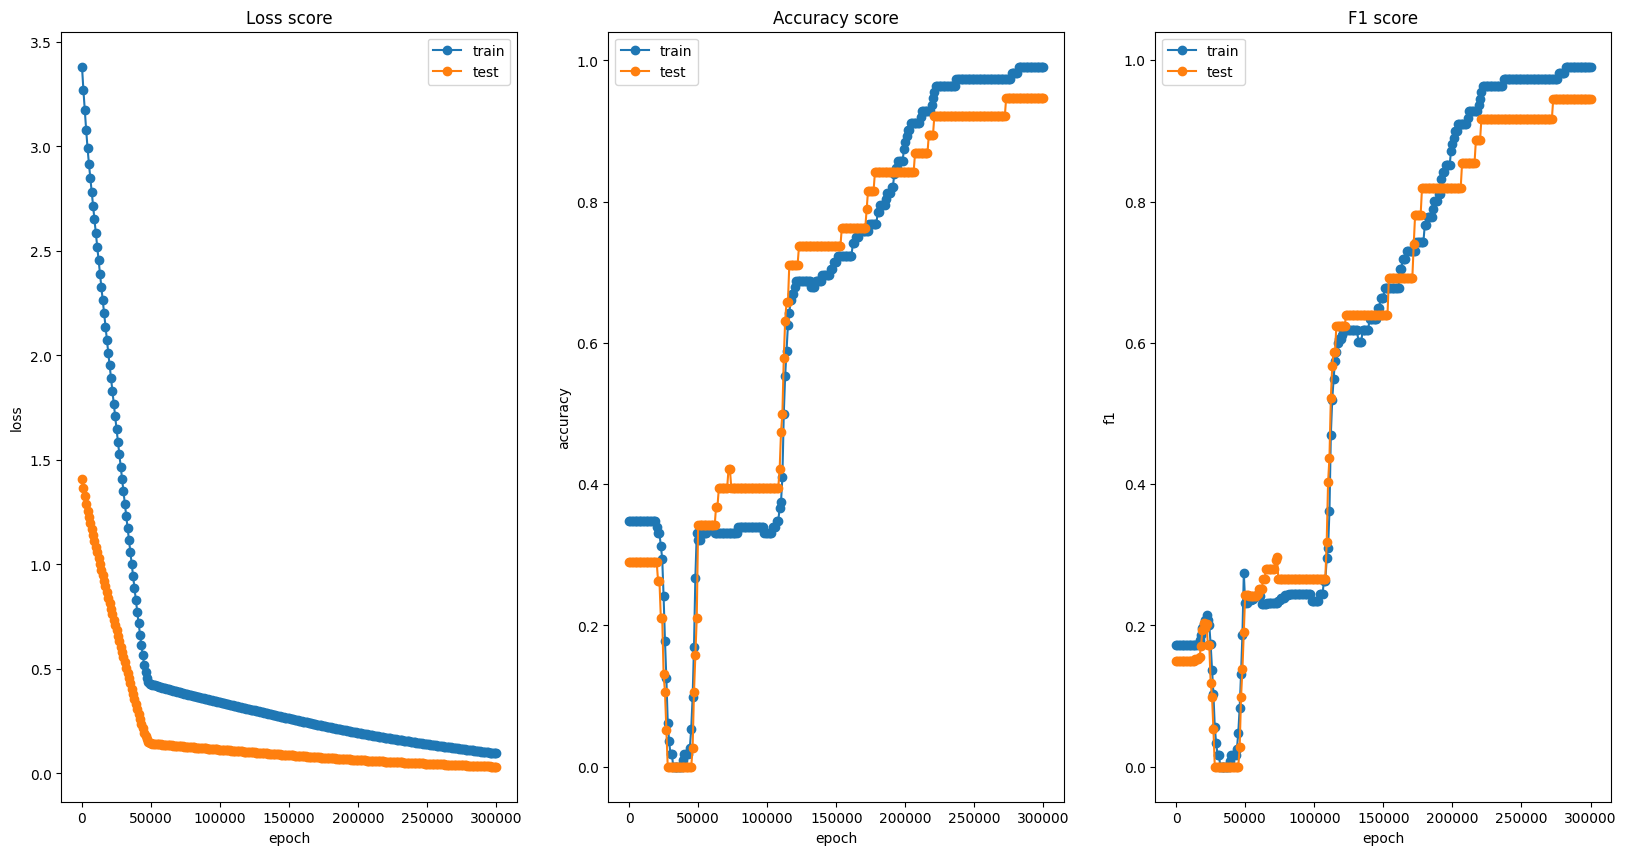

In [98]:
display(*stats1)

In [99]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplGauss:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 16, with_bias=self.with_bias, kernel=Node.gauss),
            ReluLayer(),
            LinearLayer(16, 12, with_bias=self.with_bias, kernel=Node.gauss),
            LinearLayer(12, out_dim, with_bias=self.with_bias, kernel=Node.gauss),
            SoftargmaxLayer()]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_


In [107]:
net2 = nnImplGauss(x_train.shape[1], y_train.shape[1])
stats2 = train(net2, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 24.224165461700366
epoch: 100 loss value: 24.157681789208223
epoch: 200 loss value: 24.11078758057148
epoch: 300 loss value: 24.067919176140677
epoch: 400 loss value: 24.026277505761684
epoch: 500 loss value: 23.98507004874772
epoch: 600 loss value: 23.94403034624888
epoch: 700 loss value: 23.903063759896167
epoch: 800 loss value: 23.862136023525576
epoch: 900 loss value: 23.82123464285272
epoch: 1000 loss value: 23.78035504957533
epoch: 1100 loss value: 23.739495570750293
epoch: 1200 loss value: 23.698655592388405
epoch: 1300 loss value: 23.657834887870706
epoch: 1400 loss value: 23.6170333720377
epoch: 1500 loss value: 23.57625101065248
epoch: 1600 loss value: 23.535487785826202
epoch: 1700 loss value: 23.49474368326219
epoch: 1800 loss value: 23.4540186944832
epoch: 1900 loss value: 23.413312817025396
epoch: 2000 loss value: 23.372626049379747
epoch: 2100 loss value: 23.331958389663555
epoch: 2200 loss value: 23.29130983570805
epoch: 2300 loss value: 23.25068038

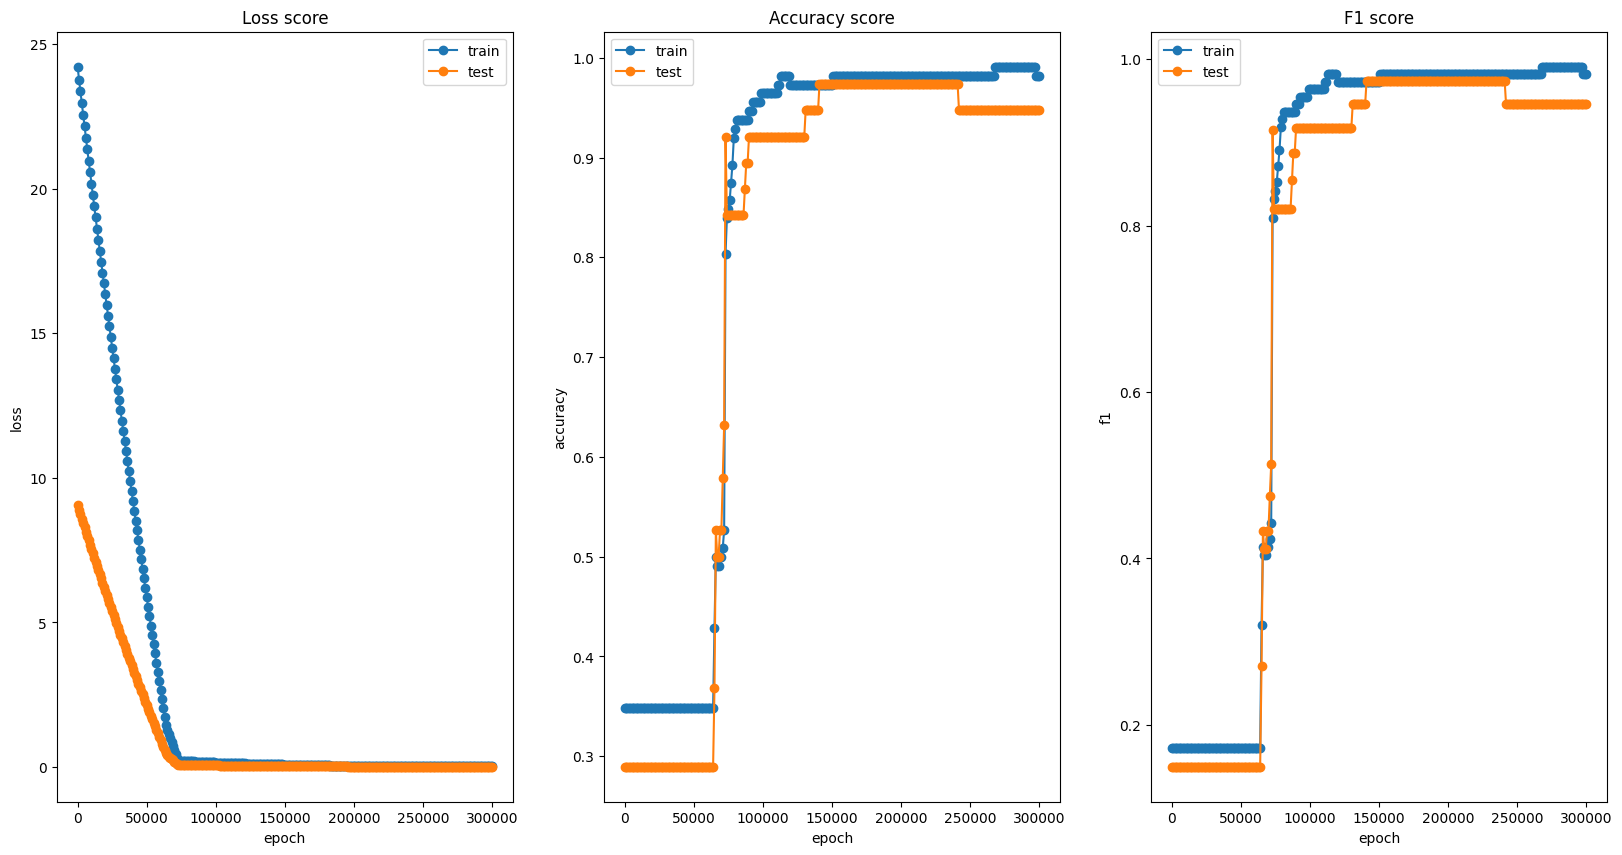

In [108]:
display(*stats2)

In [102]:
from nn_layer import nnLayer

from nn_loss import *


class nnImplMixed:

    def __init__(self, in_dim, out_dim):

        self.with_bias = True
        self.layers: np.ndarray[nnLayer] = [
            LinearLayer(in_dim, 10, with_bias=self.with_bias, kernel=Node.dot),
            ReluLayer(),
            LinearLayer(10, 15, with_bias=self.with_bias, kernel=Node.gauss),
            ReluLayer(),
            LinearLayer(15, out_dim, with_bias=self.with_bias, kernel=Node.dot),
            SoftargmaxLayer()]

    def forward(self, x_: Node) -> Node:
        for layer in self.layers:
            x_ = layer.forward(x_)
        return x_


In [103]:
net3 = nnImplMixed(x_train.shape[1], y_train.shape[1])
stats3 = train(net3, x_train, y_train, x_test, y_test)

epoch: 0 loss value: 14.714077051063809
epoch: 100 loss value: 14.661947630581702
epoch: 200 loss value: 14.625185369526262
epoch: 300 loss value: 14.591582010988544
epoch: 400 loss value: 14.558942741311718
epoch: 500 loss value: 14.526646137930767
epoch: 600 loss value: 14.494483268248581
epoch: 700 loss value: 14.462379924540246
epoch: 800 loss value: 14.430309237141392
epoch: 900 loss value: 14.39826140787333
epoch: 1000 loss value: 14.366232853413317
epoch: 1100 loss value: 14.334222260757997
epoch: 1200 loss value: 14.302229147309312
epoch: 1300 loss value: 14.270253334343293
epoch: 1400 loss value: 14.238294754352857
epoch: 1500 loss value: 14.20635338053846
epoch: 1600 loss value: 14.174429201000784
epoch: 1700 loss value: 14.142522209294597
epoch: 1800 loss value: 14.110632400971099
epoch: 1900 loss value: 14.078759772312488
epoch: 2000 loss value: 14.046904319868736
epoch: 2100 loss value: 14.015066040288017
epoch: 2200 loss value: 13.983244930254854
epoch: 2300 loss value: 1

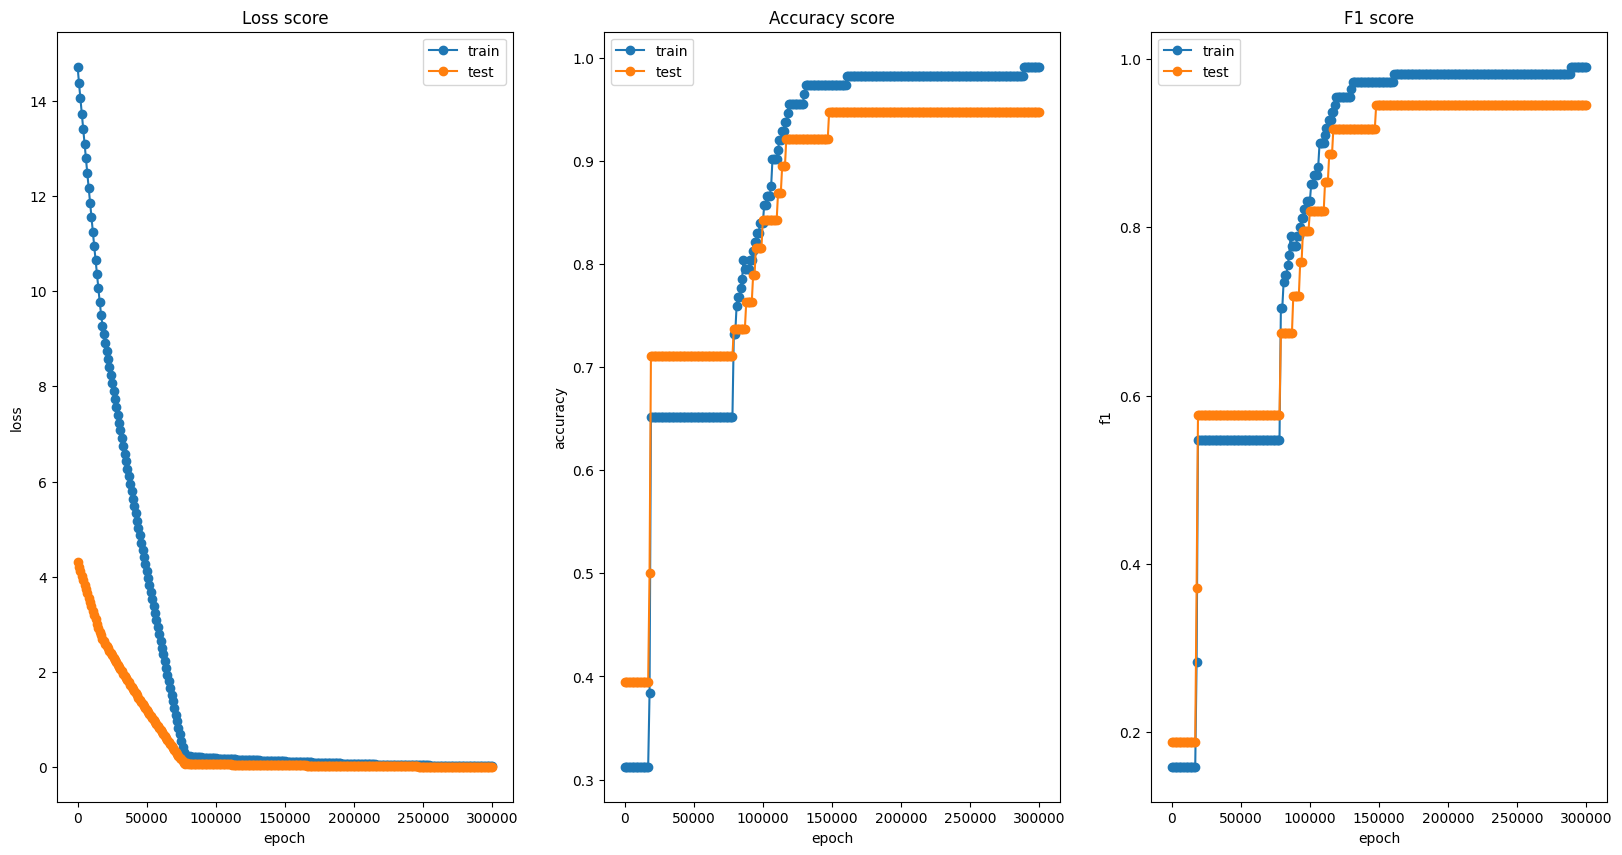

In [104]:
display(*stats3)